In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="white", font_scale=2)


In [6]:
data_folder = "../data/2022-06-04_alvin"
df = pd.read_csv(os.path.join(data_folder, 'data_pilot3.csv'), index_col=[0])
df['total_ex'] = df['heads'] + df['tails']
df['mean'] = df['heads'] / (df['heads'] + df['tails'])
df['trial'] = df['block_type'] + df['trial_num'].apply(lambda x: str(x))
df.loc[(df['student_class'] == 'A') | (
    df['student_class'] == 'B'), 'student_experience'] = 'less'
df.loc[(df['student_class'] == 'C') | (
    df['student_class'] == 'D'), 'student_experience'] = 'more'
df['theta'] = df['true_theta'] # for plotting purposes
df


,subject_id,student_idx,block_type,trial_num,true_theta,student_a,student_b,student_class,heads,tails,student_guess,error,bonus,total_bonus,understood,total_ex,mean,trial,student_experience,theta
0,0drjbtj8pl35,0,nonSeqPartial,0,0.5,4,1,B,5,5,0.60,0.10,0.00,7.85,yes,10,0.500000,nonSeqPartial0,less,0.5
1,0drjbtj8pl35,1,nonSeqPartial,0,0.2,4,1,B,0,8,0.31,0.11,0.00,7.85,yes,8,0.000000,nonSeqPartial0,less,0.2
2,0drjbtj8pl35,2,nonSeqFull,0,0.2,1,4,A,0,0,0.20,0.00,0.50,7.85,yes,0,NaN,nonSeqFull0,less,0.2
3,0drjbtj8pl35,2,nonSeqFull,0,0.2,1,4,A,0,0,0.20,0.00,0.50,7.85,yes,0,NaN,nonSeqFull0,less,0.2
4,0drjbtj8pl35,2,nonSeqFull,0,0.2,1,4,A,0,0,0.20,0.00,0.50,7.85,yes,0,NaN,nonSeqFull0,less,0.2
5,0drjbtj8pl35,2,nonSeqFull,0,0.2,1,4,A,0,0,0.20,0.00,0.50,7.85,yes,0,NaN,nonSeqFull0,less,0.2
6,0drjbtj8pl35,2,nonSeqFull,0,0.2,1,4,A,1,4,0.20,0.00,0.45,7.85,yes,5,0.200000,nonSeqFull0,less,0.2
7,0drjbtj8pl35,3,seqNoFeedback,0,0.5,8,2,D,10,10,NaN,NaN,NaN,7.85,yes,20,0.500000,seqNoFeedback0,more,0.5
8,0drjbtj8pl35,3,seqNoFeedback,1,0.5,8,2,D,5,5,0.57,0.07,0.20,7.85,yes,10,0.500000,seqNoFeedback1,more,0.5
9,0drjbtj8pl35,4,seqNoFeedback,0,0.5,4,1,B,8,2,NaN,NaN,NaN,7.85,yes,10,0.800000,seqNoFeedback0,less,0.5


In [48]:
len(pd.unique(df['subject_id']))

118

Exclusion criteria: 
- did not understand instructions
- bonus less than `$1`

In [49]:
df = df[(df['understood'] == 'yes') & (df['total_bonus'] > 1)]
len(pd.unique(df['subject_id']))

103

Check performance of four different conditions

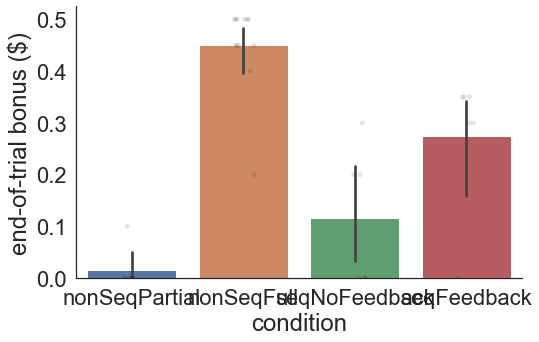

In [7]:
f, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=df, x='block_type', y='bonus')
sns.stripplot(data=df, x='block_type', y='bonus', color='black', alpha=0.1)
ax.set(ylabel='end-of-trial bonus ($)', xlabel='condition')
sns.despine()


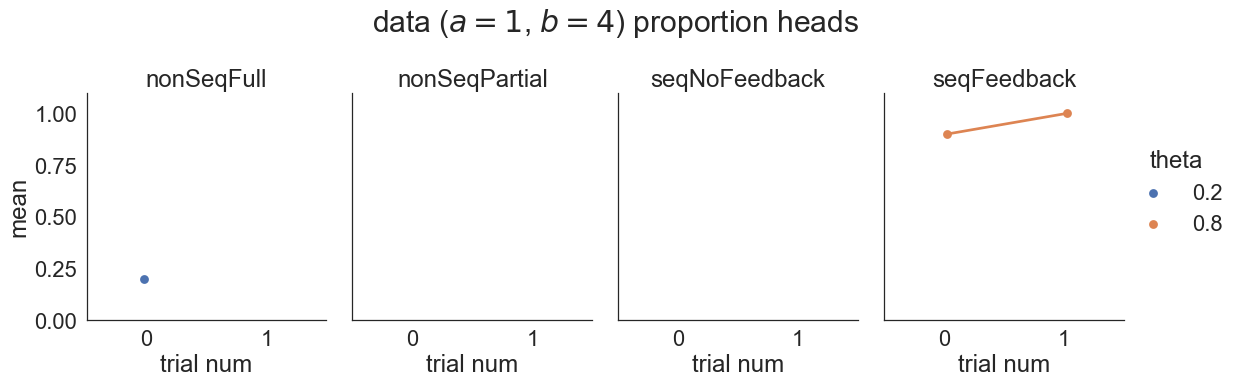

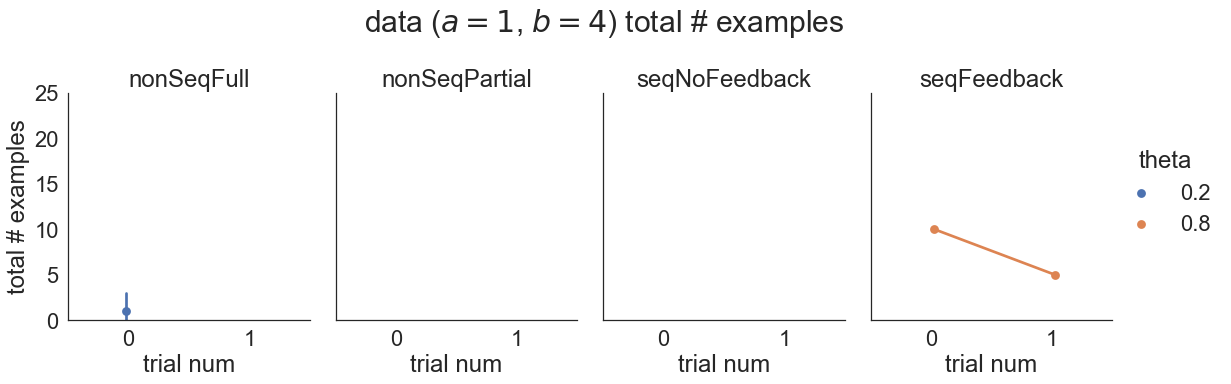

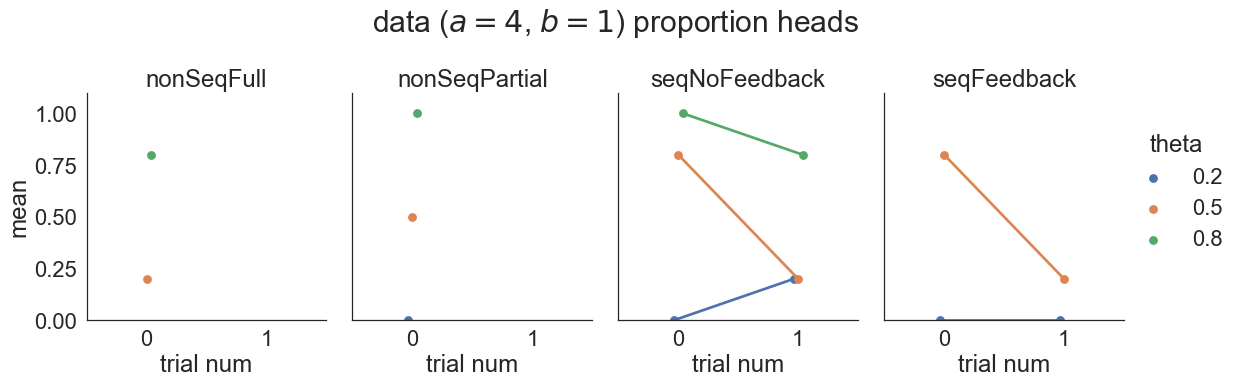

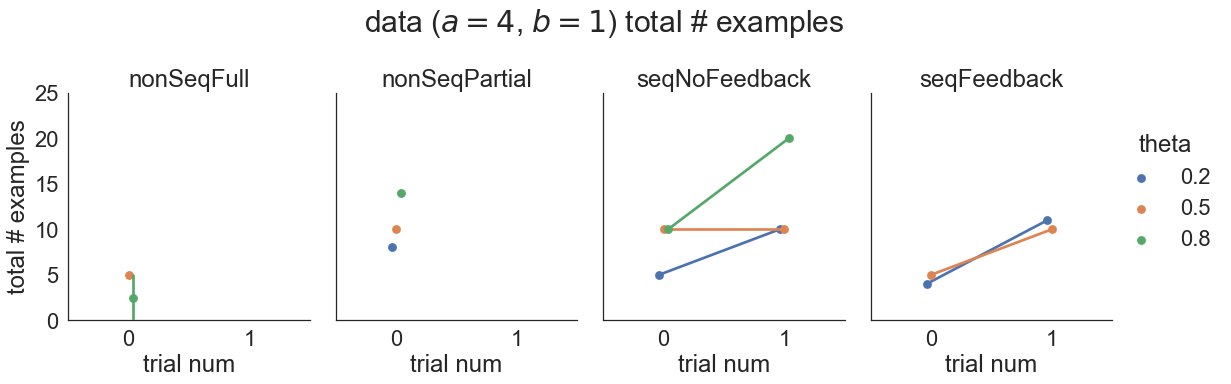

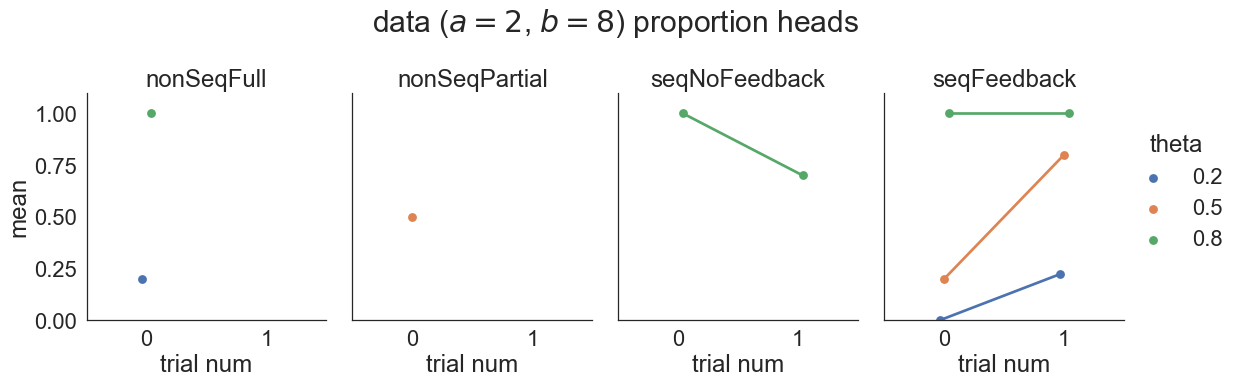

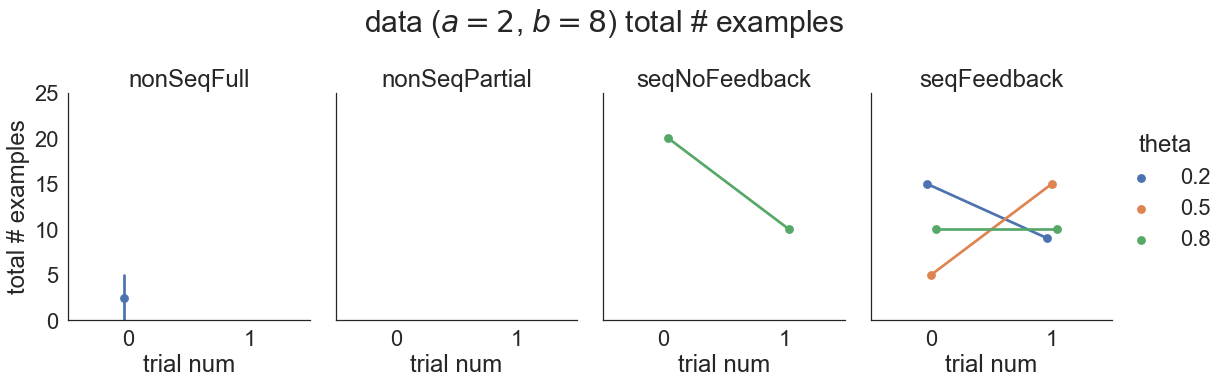

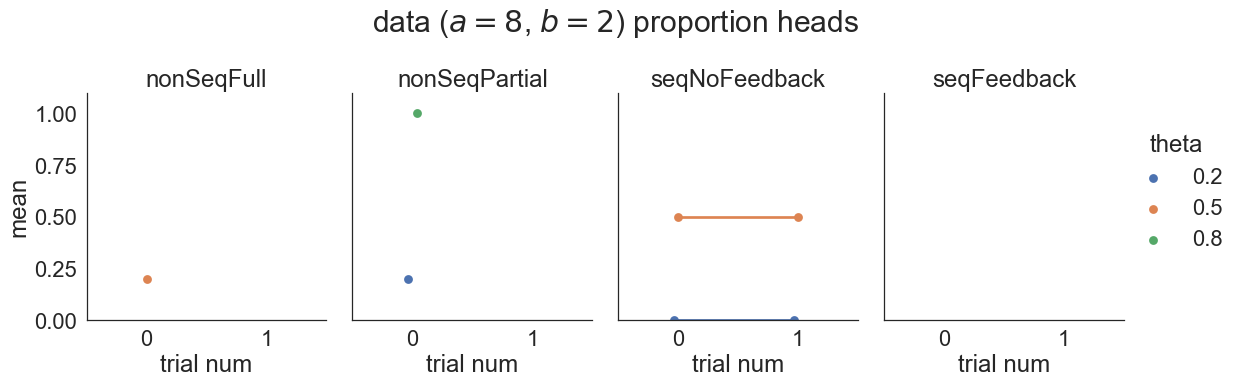

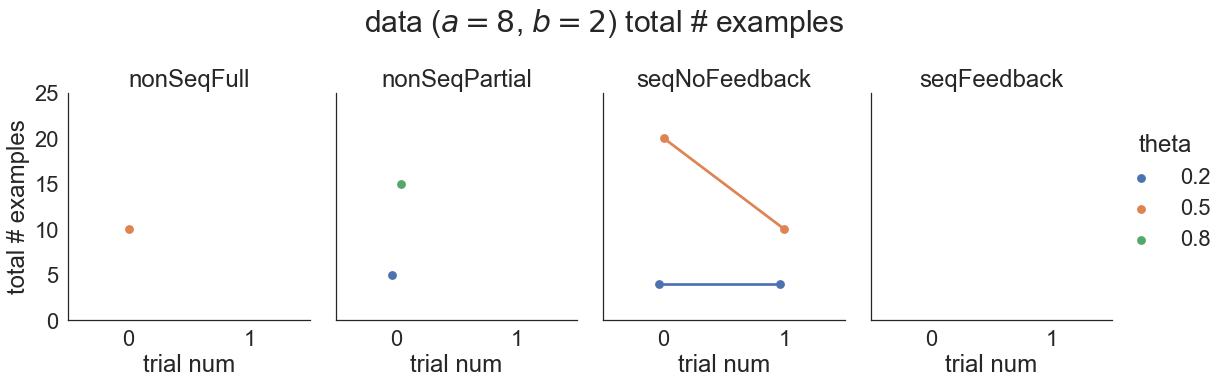

In [8]:
class_hypers = {
    'A': "($a=1$, $b=4$)",
    'B': "($a=4$, $b=1$)",
    'C': "($a=2$, $b=8$)",
    'D': "($a=8$, $b=2$)"
}

for class_id, hypers in class_hypers.items():
    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='mean', hue='theta', col='block_type', kind='point', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], aspect=0.8)
    (g.set_axis_labels("trial num")
     .set_titles("{col_name}")
     .set(ylim=(0, 1.1))
     .figure.suptitle("data " + hypers + " proportion heads", y=1.1, size=30)
     )

    plt.savefig(f"./output/pilot3_{class_id}_means_data.png", dpi=300, bbox_inches='tight')


    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='total_ex', hue='theta', col='block_type', kind='point', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], aspect=0.8)
    (g.set_axis_labels("trial num", "total # examples")
    .set(ylim=(0, 25))
     .set_titles("{col_name}")
     .figure.suptitle("data " + hypers + " total # examples", y=1.1, size=30)
     )

    plt.savefig(f"./output/pilot3_{class_id}_total_ex_data.png", dpi=300, bbox_inches='tight')


Look at the actual points

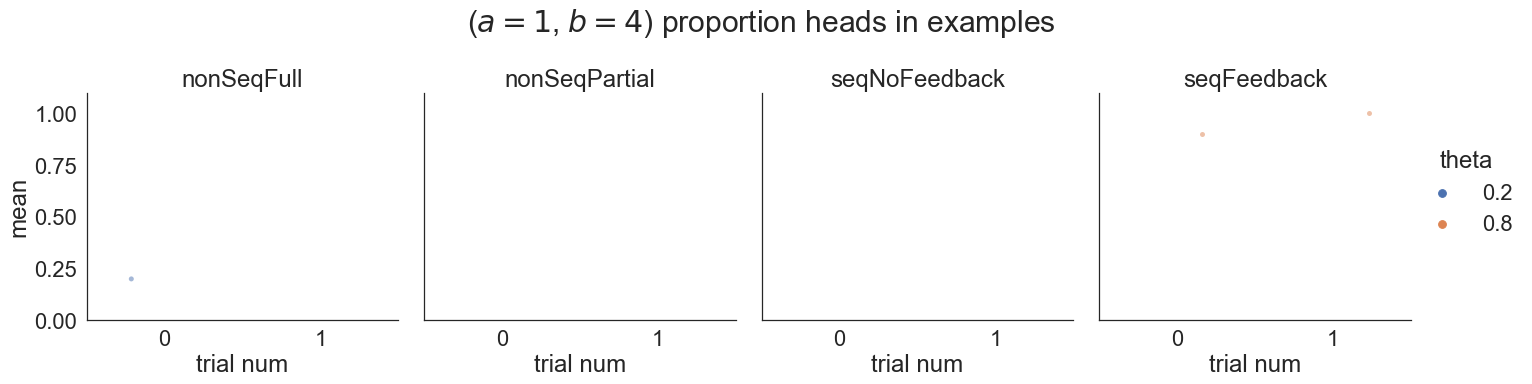

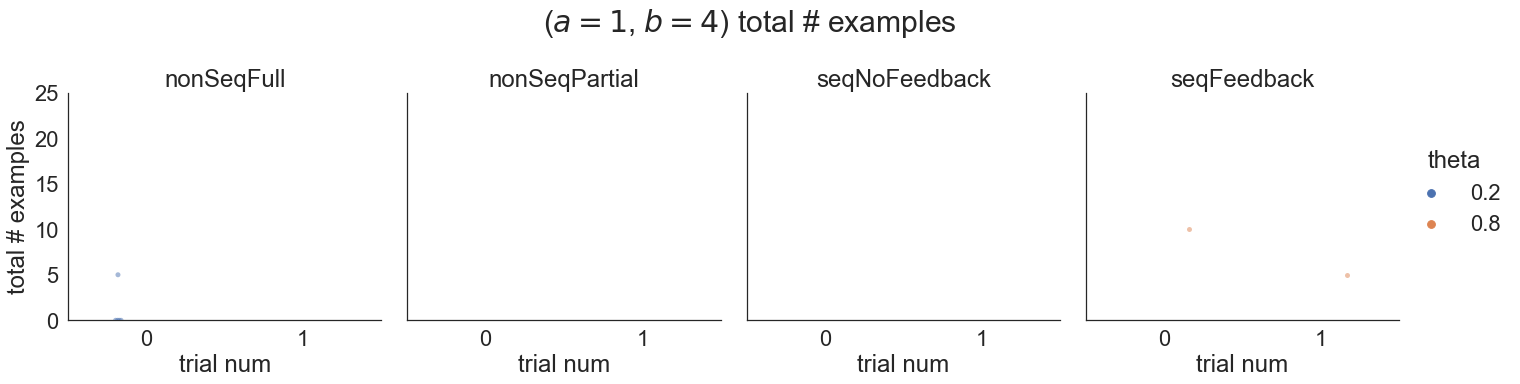

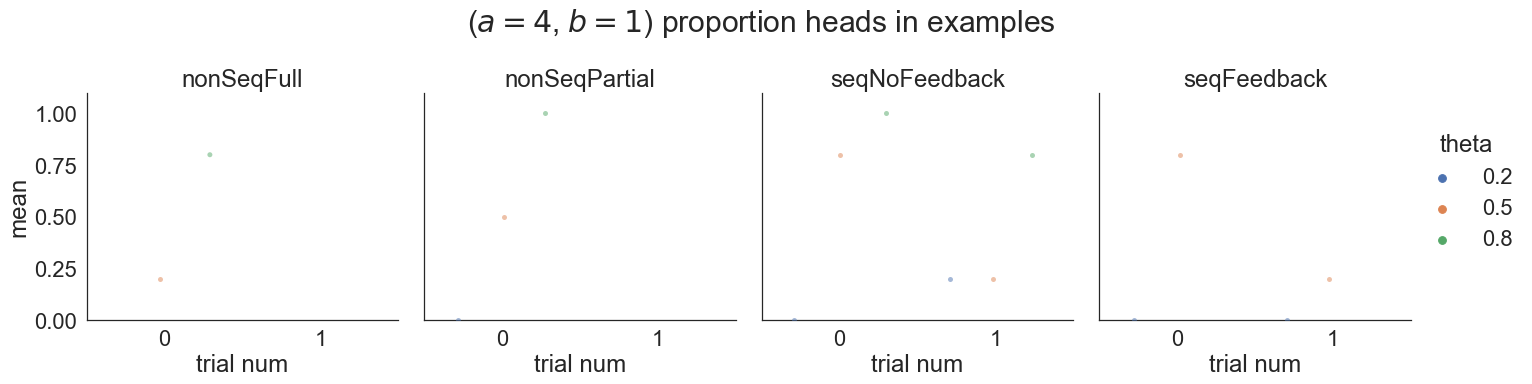

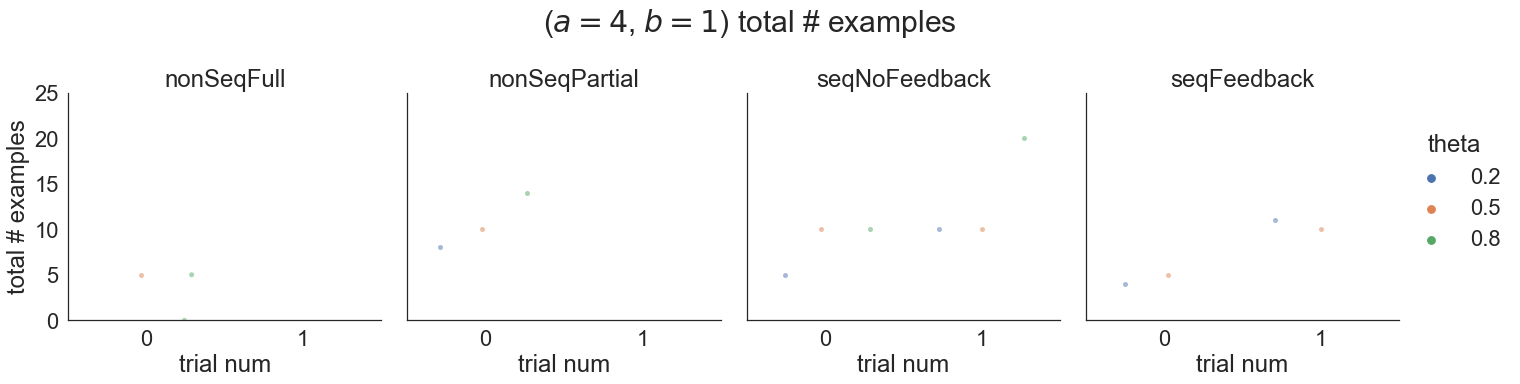

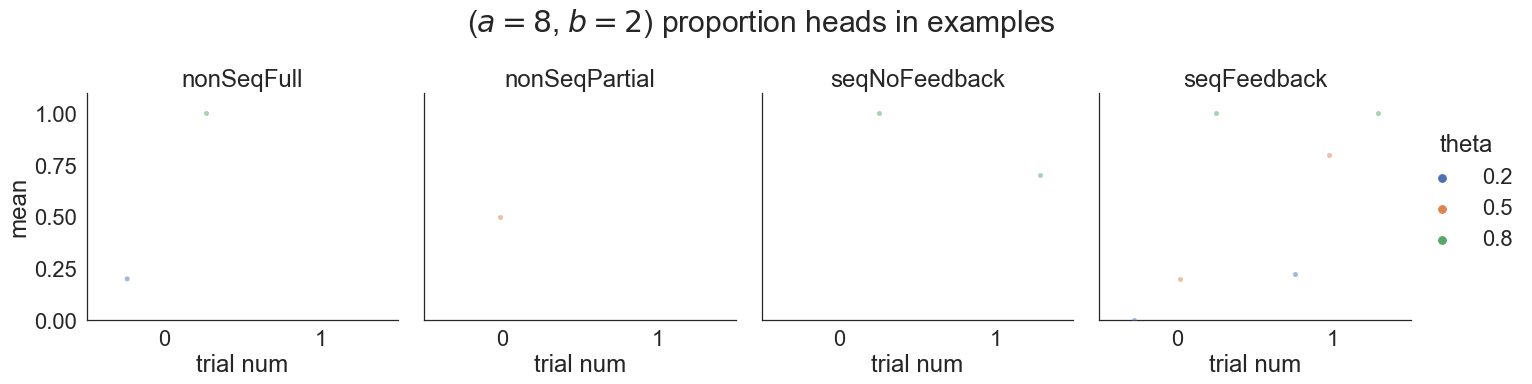

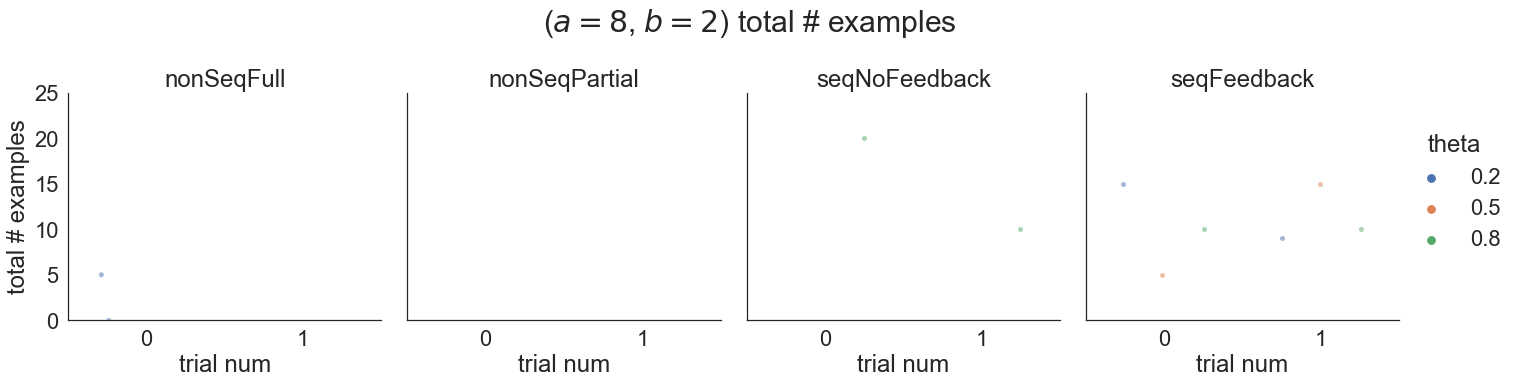

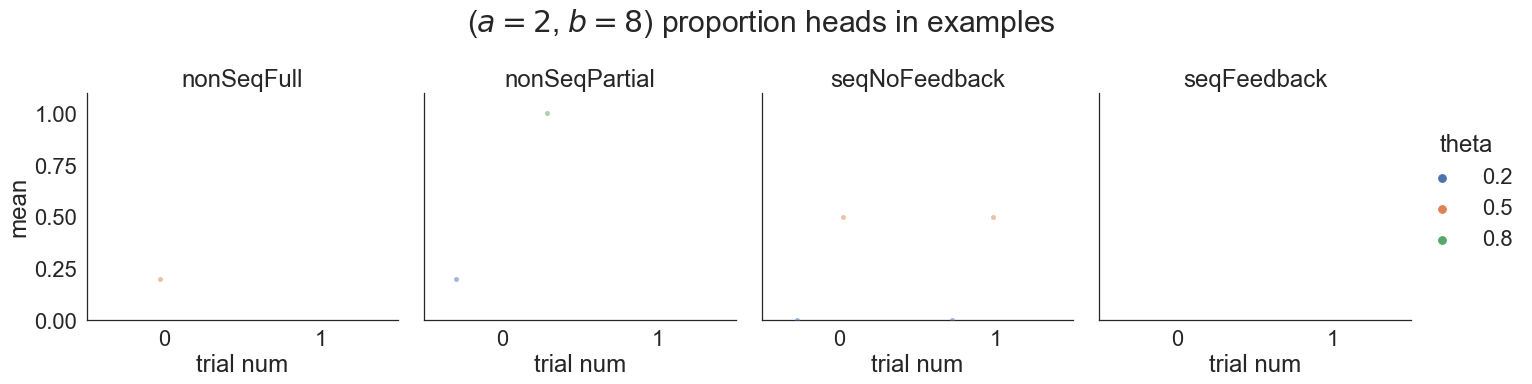

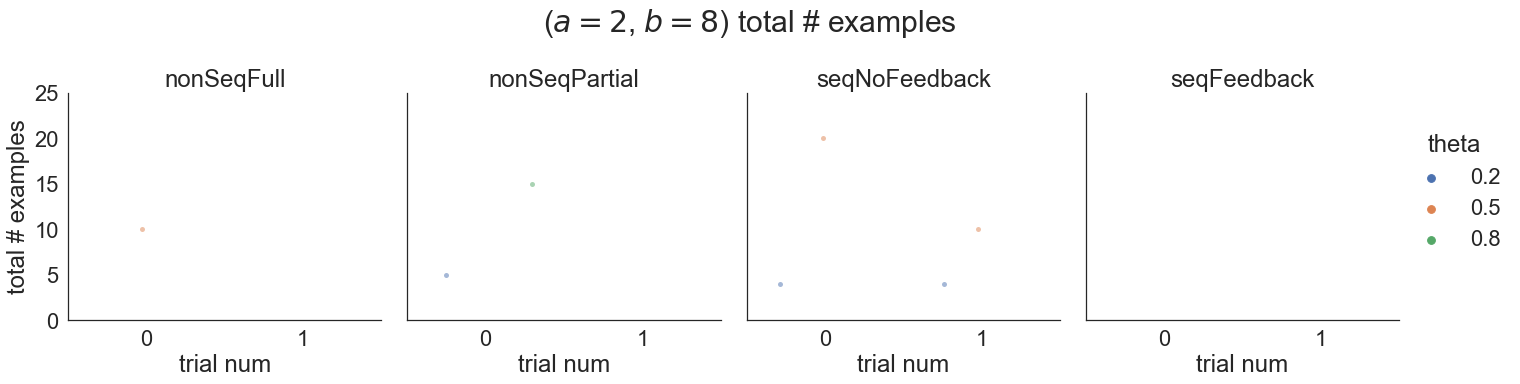

In [9]:
class_hypers = {
    'A': "($a=1$, $b=4$)",
    'B': "($a=4$, $b=1$)",
    'C': "($a=8$, $b=2$)",
    'D': "($a=2$, $b=8$)"
}

for class_id, hypers in class_hypers.items():
    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='mean', hue='theta', col='block_type', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], alpha=0.5)
    (g.set_axis_labels("trial num")
     .set_titles("{col_name}")
     .set(ylim=(0, 1.1))
     .figure.suptitle(hypers + " proportion heads in examples", y=1.1, size=30)
     )

    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='total_ex', hue='theta', col='block_type', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], alpha=0.5)
    (g.set_axis_labels("trial num", "total # examples")
    .set(ylim=(0, 25))
     .set_titles("{col_name}")
     .figure.suptitle(hypers + " total # examples", y=1.1, size=30)
     )
